In [1]:
!gdown --id 1VyGxwUTIkAGkioo_eFpVDsu6Nz-DxLDF

Downloading...
From: https://drive.google.com/uc?id=1VyGxwUTIkAGkioo_eFpVDsu6Nz-DxLDF
To: /content/way.jpg
100% 137k/137k [00:00<00:00, 50.2MB/s]


## Discrete cosine transform

In [2]:
import numpy as np


class DiscreteCosineTranform:
    def __init__(self):
        return None

    def dct(self, X):
        N = X.shape[0]
        U = np.arange(N)        
        idx = U.reshape(-1, 1) * (2 * U + 1).reshape(1, -1)    
        A = np.array([(1 / N) ** 0.5] + [(2 / N) ** 0.5] * (N - 1))
        A = A.reshape(-1, 1)
        return A * (np.cos(idx * np.pi / (2 * N)) @ X)
        
    def idct(self, X):
        N = X.shape[0]
        U = np.arange(N)
        idx = (2 * U + 1).reshape(-1, 1) * U.reshape(1, -1)
        A = np.array([(1 / N) ** 0.5] + [(2 / N) ** 0.5] * (N - 1))    
        A = A.reshape(-1, 1)
        return np.cos(idx * np.pi / (2 * N)) @ (X * A)
    
    def dct2D(self, image):
        return self.dct(self.dct(image).T).T
    
    def idct2D(self, image):
        return self.idct(self.idct(image).T).T

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('way.jpg', 0)
DCT = DiscreteCosineTranform()
out_dct2D = DCT.dct2D(image)
out_idct2D = DCT.idct2D(out_dct2D)

Text(0.5, 1.0, '2D IDCT')

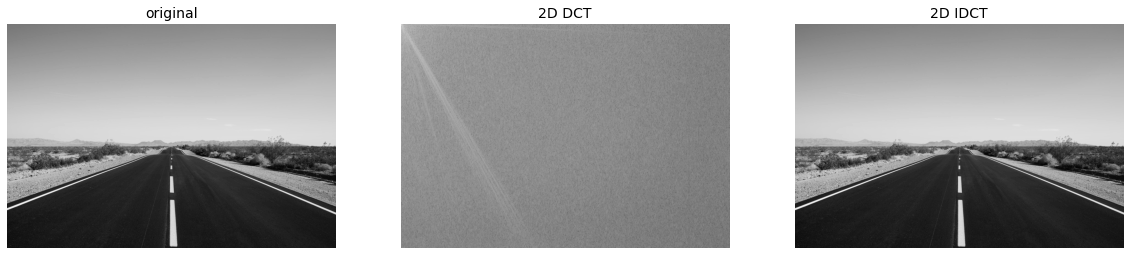

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=14)

ax[1].imshow(np.log(np.abs(out_dct2D)), cmap="gray")
ax[1].axis("off")
ax[1].set_title("2D DCT", fontsize=14)

ax[2].imshow(out_idct2D, cmap="gray")
ax[2].axis("off")
ax[2].set_title("2D IDCT", fontsize=14)

## Discrete Fourier Transform

In [5]:
import math
import numpy as np

class FourierTransform:
    def __init__(self):
        return None

    def dft(self, X):
        N = X.shape[0]
        U = np.arange(N)
        idx = U.reshape(-1, 1) * U
        return np.exp((-2j * np.pi / N) * idx) @ X        

    def idft(self, X):
        N = X.shape[0]
        U = np.arange(N)
        idx = U.reshape(-1, 1) * U
        return (np.exp((2j * np.pi / N) * idx) @ X) / N

    def dft2D(self, image):
        return self.dft(self.dft(image).T).T

    def idft2D(self, image):
        return self.idft(self.idft(image).T).T.real

In [6]:
import numpy as np
import cv2

image = cv2.imread('way.jpg', 0)
Fourier = FourierTransform()
out_2D = Fourier.dft2D(image)
out_idft_2D = Fourier.idft2D(out_2D)

Text(0.5, 1.0, '2D IDFT')

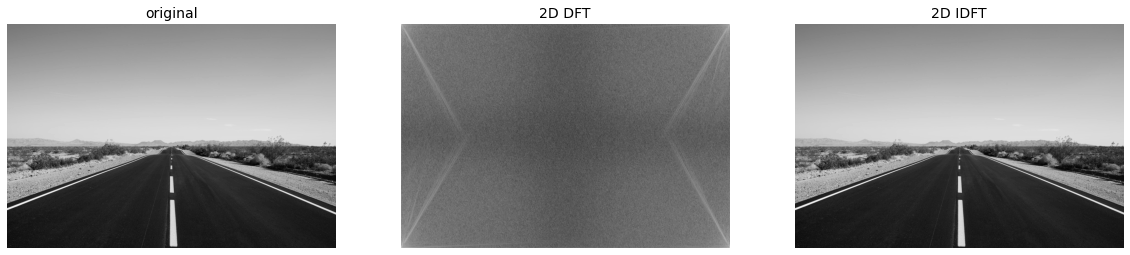

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 16))
ax[0].imshow(image, cmap="gray")
ax[0].axis("off")
ax[0].set_title("original", fontsize=14)

ax[1].imshow(np.log(np.abs(out_2D) + 1), cmap="gray")
ax[1].axis("off")
ax[1].set_title("2D DFT", fontsize=14)

ax[2].imshow(out_idft_2D, cmap="gray")
ax[2].axis("off")
ax[2].set_title("2D IDFT", fontsize=14)